# Project 2020
<br>

#### Training regression models using Keras.  The author is Owen Coleman (G00387850@gmit.ie).
***

#### Overview

In this notebook you will find the two regression models that were used in the powerprod web service. These models were creating and trained using machine learning. I have also included explanations and some analysis of the accuracy of each of the models. 

#### Imports
Lets first import all the required libraries and configure our display options.

In [1]:
import numpy as np
import tensorflow.keras as kr
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [14, 8]

#### Powerproduction Dataset

Lets read the dataset into a pandas dataframe and display it with matplotlib. Before we do this we must first clean the dataset, removing a few instances where power values were recorded as zero toward the end of the dataset. 

The plot below shows our data with speed on the x axis and power on the y axis. We can see that it takes a particular amount of wind speed to activate any sort of real power generation from the turbines, from which point power geneation grows dramatically  with wind speed increase before leveling off at about 100KW/h.

In [2]:
df = pd.read_csv("powerproduction.csv")

In [3]:
#Remove the unreasonable power values
zeroVals = df[(df["speed"] > 10) & (df["power"] == 0)].index
df.drop(zeroVals, inplace=True)

Text(0, 0.5, 'Power Output')

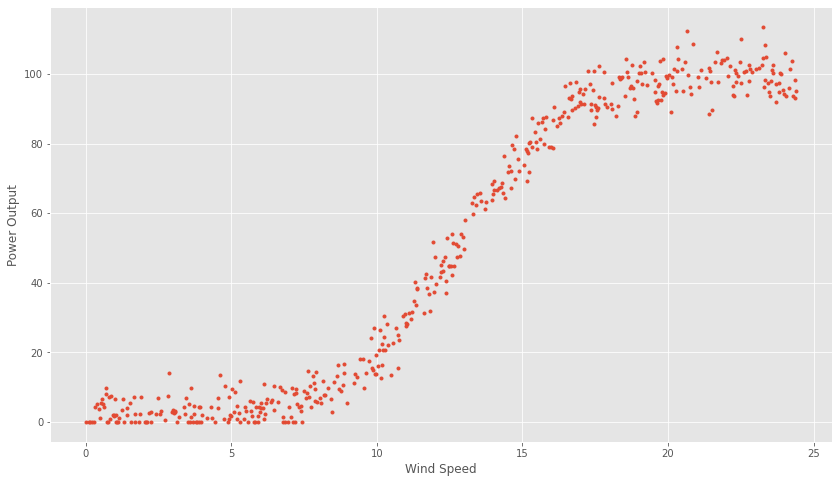

In [4]:
plt.plot(df["speed"], df["power"], '.')
# Add axis labels and a legend.
plt.xlabel('Wind Speed')
plt.ylabel('Power Output')

In [5]:
#storing speed and power in xy numpy arrays for ease of access.
x = np.array(df["speed"])
y = np.array(df["power"])

<br>

#### Linear Regression Model

We will be writing our regression models using the Keras python library[1](https://keras.io/). Keras is an open source software library that acts as an interface for the TensorFlow library, and overall makes machine learning much easier for beginners.

Lets first try to fit our data to a linear regression model. Below we create our neural network with the keras.Sequential[2](https://keras.io/api/models/sequential/) class. This is a general purpose class that allows us to move linearlly through the layers of our network. As we are performing simple linear regression, we need only a single layer with one neuron. We are using a Dense layer for this neural network, as it is the most common and frequently used layer[3](https://www.tutorialspoint.com/keras/keras_dense_layer.htm). Within this layer we provide the number of nuerons(1), the shape of our input (which is a single value x), our activation function and our *weight* and *bias* initializers. 

As we are essentially fitting a straight line to a database, we can use the following equation:

$$y = mx +c$$

In our neural network, our Dense layer with a linear activation does this computation for us, only here our *m* is our networks initial *weight* value and our *c* is the bias value. Next, we compile our model with the gradient descent method 'adam' and computing our loss as the *mean squared error*.


In [6]:
# Create our neural network with the sequential class. Code adapted from [8].
model = kr.models.Sequential()
#Add our layer with single nueron for y=wx+b calculation
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
#Compile with adam and MSE loss calculation.
model.compile('adam', loss='mean_squared_error')

In [7]:
# Train the neural network on our dataset. 1500 epochs.
history = model.fit(x, y, epochs=1500)

Epoch 1/1500
16/16 [==============================] - 0s 533us/step - loss: 2547.0352
Epoch 2/1500
16/16 [==============================] - 0s 733us/step - loss: 2443.5250
Epoch 3/1500
16/16 [==============================] - 0s 733us/step - loss: 2579.8351
Epoch 4/1500
16/16 [==============================] - 0s 667us/step - loss: 2374.3030
Epoch 5/1500
16/16 [==============================] - 0s 467us/step - loss: 2514.0280
Epoch 6/1500
16/16 [==============================] - 0s 733us/step - loss: 2387.8275
Epoch 7/1500
16/16 [==============================] - 0s 733us/step - loss: 2323.4163
Epoch 8/1500
16/16 [==============================] - 0s 533us/step - loss: 2325.2461
Epoch 9/1500
16/16 [==============================] - 0s 733us/step - loss: 2370.7207
Epoch 10/1500
16/16 [==============================] - 0s 667us/step - loss: 2588.1650
Epoch 11/1500
16/16 [==============================] - 0s 667us/step - loss: 2528.7129
Epoch 12/1500
16/16 [==============================]

Epoch 95/1500
16/16 [==============================] - 0s 600us/step - loss: 1003.8660
Epoch 96/1500
16/16 [==============================] - 0s 733us/step - loss: 1018.8676
Epoch 97/1500
16/16 [==============================] - 0s 600us/step - loss: 967.2613
Epoch 98/1500
16/16 [==============================] - 0s 800us/step - loss: 1032.0967
Epoch 99/1500
16/16 [==============================] - 0s 600us/step - loss: 1030.6795
Epoch 100/1500
16/16 [==============================] - 0s 733us/step - loss: 1052.7394
Epoch 101/1500
16/16 [==============================] - 0s 733us/step - loss: 1027.5301
Epoch 102/1500
16/16 [==============================] - 0s 733us/step - loss: 980.3126
Epoch 103/1500
16/16 [==============================] - 0s 600us/step - loss: 981.6429
Epoch 104/1500
16/16 [==============================] - 0s 600us/step - loss: 1028.6632
Epoch 105/1500
16/16 [==============================] - 0s 667us/step - loss: 992.1272
Epoch 106/1500
16/16 [===================

16/16 [==============================] - 0s 733us/step - loss: 448.5615
Epoch 190/1500
16/16 [==============================] - 0s 667us/step - loss: 416.0759
Epoch 191/1500
16/16 [==============================] - 0s 733us/step - loss: 453.8974
Epoch 192/1500
16/16 [==============================] - 0s 667us/step - loss: 429.7642
Epoch 193/1500
16/16 [==============================] - 0s 800us/step - loss: 470.2688
Epoch 194/1500
16/16 [==============================] - 0s 667us/step - loss: 447.1753
Epoch 195/1500
16/16 [==============================] - 0s 600us/step - loss: 409.8179
Epoch 196/1500
16/16 [==============================] - 0s 733us/step - loss: 423.5501
Epoch 197/1500
16/16 [==============================] - 0s 733us/step - loss: 435.8933
Epoch 198/1500
16/16 [==============================] - ETA: 0s - loss: 401.107 - 0s 733us/step - loss: 422.2212
Epoch 199/1500
16/16 [==============================] - 0s 667us/step - loss: 435.4038
Epoch 200/1500
16/16 [==========

16/16 [==============================] - 0s 600us/step - loss: 306.2790
Epoch 283/1500
16/16 [==============================] - 0s 600us/step - loss: 286.5028
Epoch 284/1500
16/16 [==============================] - 0s 933us/step - loss: 284.7666
Epoch 285/1500
16/16 [==============================] - ETA: 0s - loss: 299.695 - 0s 800us/step - loss: 299.6736
Epoch 286/1500
16/16 [==============================] - 0s 800us/step - loss: 299.2518
Epoch 287/1500
16/16 [==============================] - 0s 800us/step - loss: 292.5911
Epoch 288/1500
16/16 [==============================] - 0s 600us/step - loss: 293.5546
Epoch 289/1500
16/16 [==============================] - ETA: 0s - loss: 255.300 - 0s 533us/step - loss: 282.0658
Epoch 290/1500
16/16 [==============================] - 0s 600us/step - loss: 278.7465
Epoch 291/1500
16/16 [==============================] - 0s 600us/step - loss: 288.1418
Epoch 292/1500
16/16 [==============================] - 0s 600us/step - loss: 296.2955
Epoch 

16/16 [==============================] - 0s 600us/step - loss: 263.4422
Epoch 376/1500
16/16 [==============================] - 0s 533us/step - loss: 273.5901
Epoch 377/1500
16/16 [==============================] - 0s 667us/step - loss: 268.6544
Epoch 378/1500
16/16 [==============================] - 0s 867us/step - loss: 273.9858
Epoch 379/1500
16/16 [==============================] - 0s 800us/step - loss: 256.9872
Epoch 380/1500
16/16 [==============================] - 0s 800us/step - loss: 263.5325
Epoch 381/1500
16/16 [==============================] - 0s 800us/step - loss: 283.4095
Epoch 382/1500
16/16 [==============================] - 0s 733us/step - loss: 290.4774
Epoch 383/1500
16/16 [==============================] - 0s 800us/step - loss: 270.5089
Epoch 384/1500
16/16 [==============================] - 0s 600us/step - loss: 270.8785
Epoch 385/1500
16/16 [==============================] - 0s 733us/step - loss: 281.1412
Epoch 386/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 600us/step - loss: 253.0798
Epoch 470/1500
16/16 [==============================] - 0s 533us/step - loss: 254.7191
Epoch 471/1500
16/16 [==============================] - 0s 667us/step - loss: 263.7424
Epoch 472/1500
16/16 [==============================] - 0s 733us/step - loss: 272.4317
Epoch 473/1500
16/16 [==============================] - 0s 667us/step - loss: 268.9329
Epoch 474/1500
16/16 [==============================] - 0s 467us/step - loss: 258.5428
Epoch 475/1500
16/16 [==============================] - 0s 533us/step - loss: 257.6780
Epoch 476/1500
16/16 [==============================] - 0s 467us/step - loss: 264.7157
Epoch 477/1500
16/16 [==============================] - 0s 667us/step - loss: 268.5453
Epoch 478/1500
16/16 [==============================] - 0s 467us/step - loss: 268.6640
Epoch 479/1500
16/16 [==============================] - 0s 600us/step - loss: 238.1973
Epoch 480/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 533us/step - loss: 243.2404
Epoch 564/1500
16/16 [==============================] - 0s 533us/step - loss: 235.1310
Epoch 565/1500
16/16 [==============================] - 0s 667us/step - loss: 249.3867
Epoch 566/1500
16/16 [==============================] - 0s 667us/step - loss: 236.9517
Epoch 567/1500
16/16 [==============================] - 0s 600us/step - loss: 257.3239
Epoch 568/1500
16/16 [==============================] - 0s 667us/step - loss: 256.6605
Epoch 569/1500
16/16 [==============================] - 0s 600us/step - loss: 242.1174
Epoch 570/1500
16/16 [==============================] - 0s 533us/step - loss: 235.0165
Epoch 571/1500
16/16 [==============================] - 0s 533us/step - loss: 262.0418
Epoch 572/1500
16/16 [==============================] - 0s 533us/step - loss: 239.9338
Epoch 573/1500
16/16 [==============================] - 0s 533us/step - loss: 240.0870
Epoch 574/1500
16/16 [==============================] - 0s

16/16 [==============================] - 0s 733us/step - loss: 213.7824
Epoch 658/1500
16/16 [==============================] - 0s 867us/step - loss: 237.6423
Epoch 659/1500
16/16 [==============================] - 0s 933us/step - loss: 245.1869
Epoch 660/1500
16/16 [==============================] - 0s 867us/step - loss: 233.3383
Epoch 661/1500
16/16 [==============================] - 0s 933us/step - loss: 234.9245
Epoch 662/1500
16/16 [==============================] - 0s 733us/step - loss: 256.0719
Epoch 663/1500
16/16 [==============================] - 0s 667us/step - loss: 227.1926
Epoch 664/1500
16/16 [==============================] - 0s 867us/step - loss: 237.0705
Epoch 665/1500
16/16 [==============================] - 0s 1ms/step - loss: 233.1333
Epoch 666/1500
16/16 [==============================] - 0s 933us/step - loss: 243.1247
Epoch 667/1500
16/16 [==============================] - 0s 1ms/step - loss: 227.1849
Epoch 668/1500
16/16 [==============================] - 0s 100

16/16 [==============================] - 0s 733us/step - loss: 219.8945
Epoch 752/1500
16/16 [==============================] - 0s 733us/step - loss: 215.4038
Epoch 753/1500
16/16 [==============================] - 0s 733us/step - loss: 231.9383
Epoch 754/1500
16/16 [==============================] - 0s 800us/step - loss: 231.6159
Epoch 755/1500
16/16 [==============================] - 0s 733us/step - loss: 218.1284
Epoch 756/1500
16/16 [==============================] - 0s 867us/step - loss: 228.7646
Epoch 757/1500
16/16 [==============================] - 0s 667us/step - loss: 212.8957
Epoch 758/1500
16/16 [==============================] - 0s 600us/step - loss: 230.5350
Epoch 759/1500
16/16 [==============================] - 0s 733us/step - loss: 234.3749
Epoch 760/1500
16/16 [==============================] - 0s 733us/step - loss: 226.2365
Epoch 761/1500
16/16 [==============================] - 0s 667us/step - loss: 239.3134
Epoch 762/1500
16/16 [==============================] - 0s

Epoch 844/1500
16/16 [==============================] - 0s 533us/step - loss: 222.0704
Epoch 845/1500
16/16 [==============================] - 0s 533us/step - loss: 219.1742
Epoch 846/1500
16/16 [==============================] - 0s 667us/step - loss: 199.3990
Epoch 847/1500
16/16 [==============================] - 0s 533us/step - loss: 221.1283
Epoch 848/1500
16/16 [==============================] - 0s 533us/step - loss: 212.5844
Epoch 849/1500
16/16 [==============================] - 0s 667us/step - loss: 220.2218
Epoch 850/1500
16/16 [==============================] - 0s 600us/step - loss: 210.5448
Epoch 851/1500
16/16 [==============================] - 0s 533us/step - loss: 227.9460
Epoch 852/1500
16/16 [==============================] - 0s 600us/step - loss: 217.4060
Epoch 853/1500
16/16 [==============================] - 0s 600us/step - loss: 219.5781
Epoch 854/1500
16/16 [==============================] - 0s 533us/step - loss: 218.2071
Epoch 855/1500
16/16 [=====================

16/16 [==============================] - 0s 467us/step - loss: 198.8695
Epoch 939/1500
16/16 [==============================] - 0s 467us/step - loss: 213.6514
Epoch 940/1500
16/16 [==============================] - 0s 600us/step - loss: 212.9807
Epoch 941/1500
16/16 [==============================] - 0s 600us/step - loss: 216.5157
Epoch 942/1500
16/16 [==============================] - 0s 600us/step - loss: 209.1061
Epoch 943/1500
16/16 [==============================] - 0s 533us/step - loss: 212.8746
Epoch 944/1500
16/16 [==============================] - 0s 533us/step - loss: 196.9224
Epoch 945/1500
16/16 [==============================] - 0s 600us/step - loss: 210.6155
Epoch 946/1500
16/16 [==============================] - 0s 600us/step - loss: 200.0893
Epoch 947/1500
16/16 [==============================] - 0s 533us/step - loss: 210.2454
Epoch 948/1500
16/16 [==============================] - 0s 534us/step - loss: 204.7617
Epoch 949/1500
16/16 [==============================] - 0s

Epoch 1032/1500
16/16 [==============================] - 0s 667us/step - loss: 200.6555
Epoch 1033/1500
16/16 [==============================] - 0s 667us/step - loss: 195.9951
Epoch 1034/1500
16/16 [==============================] - 0s 734us/step - loss: 209.3419
Epoch 1035/1500
16/16 [==============================] - 0s 667us/step - loss: 204.3197
Epoch 1036/1500
16/16 [==============================] - 0s 733us/step - loss: 212.4322
Epoch 1037/1500
16/16 [==============================] - 0s 600us/step - loss: 185.2997
Epoch 1038/1500
16/16 [==============================] - 0s 667us/step - loss: 196.0956
Epoch 1039/1500
16/16 [==============================] - 0s 667us/step - loss: 203.4424
Epoch 1040/1500
16/16 [==============================] - 0s 667us/step - loss: 198.4519
Epoch 1041/1500
16/16 [==============================] - 0s 667us/step - loss: 193.4391
Epoch 1042/1500
16/16 [==============================] - 0s 667us/step - loss: 204.7349
Epoch 1043/1500
16/16 [=========

16/16 [==============================] - 0s 533us/step - loss: 195.1884
Epoch 1126/1500
16/16 [==============================] - 0s 467us/step - loss: 187.9701
Epoch 1127/1500
16/16 [==============================] - 0s 600us/step - loss: 210.0498
Epoch 1128/1500
16/16 [==============================] - 0s 733us/step - loss: 206.0265
Epoch 1129/1500
16/16 [==============================] - 0s 600us/step - loss: 193.6115
Epoch 1130/1500
16/16 [==============================] - 0s 600us/step - loss: 200.0233
Epoch 1131/1500
16/16 [==============================] - 0s 667us/step - loss: 190.7815
Epoch 1132/1500
16/16 [==============================] - 0s 600us/step - loss: 203.0163
Epoch 1133/1500
16/16 [==============================] - 0s 533us/step - loss: 198.4759
Epoch 1134/1500
16/16 [==============================] - 0s 733us/step - loss: 196.2024
Epoch 1135/1500
16/16 [==============================] - 0s 667us/step - loss: 201.6093
Epoch 1136/1500
16/16 [=========================

16/16 [==============================] - 0s 600us/step - loss: 193.0590
Epoch 1219/1500
16/16 [==============================] - 0s 533us/step - loss: 206.3133
Epoch 1220/1500
16/16 [==============================] - 0s 600us/step - loss: 197.9242
Epoch 1221/1500
16/16 [==============================] - 0s 600us/step - loss: 183.4189
Epoch 1222/1500
16/16 [==============================] - 0s 600us/step - loss: 201.6933
Epoch 1223/1500
16/16 [==============================] - 0s 533us/step - loss: 190.2025
Epoch 1224/1500
16/16 [==============================] - 0s 600us/step - loss: 189.2680
Epoch 1225/1500
16/16 [==============================] - 0s 533us/step - loss: 189.8664
Epoch 1226/1500
16/16 [==============================] - 0s 600us/step - loss: 186.0785
Epoch 1227/1500
16/16 [==============================] - 0s 533us/step - loss: 190.9173
Epoch 1228/1500
16/16 [==============================] - 0s 600us/step - loss: 195.0619
Epoch 1229/1500
16/16 [=========================

16/16 [==============================] - 0s 533us/step - loss: 188.6021
Epoch 1312/1500
16/16 [==============================] - 0s 467us/step - loss: 202.9972
Epoch 1313/1500
16/16 [==============================] - 0s 533us/step - loss: 200.4914
Epoch 1314/1500
16/16 [==============================] - 0s 533us/step - loss: 192.6527
Epoch 1315/1500
16/16 [==============================] - 0s 600us/step - loss: 188.7438
Epoch 1316/1500
16/16 [==============================] - 0s 667us/step - loss: 193.7827
Epoch 1317/1500
16/16 [==============================] - 0s 667us/step - loss: 173.0047
Epoch 1318/1500
16/16 [==============================] - 0s 533us/step - loss: 194.4500
Epoch 1319/1500
16/16 [==============================] - 0s 600us/step - loss: 184.5960
Epoch 1320/1500
16/16 [==============================] - 0s 667us/step - loss: 190.8896
Epoch 1321/1500
16/16 [==============================] - 0s 667us/step - loss: 197.6167
Epoch 1322/1500
16/16 [=========================

Epoch 1404/1500
16/16 [==============================] - 0s 533us/step - loss: 192.1751
Epoch 1405/1500
16/16 [==============================] - 0s 533us/step - loss: 174.3054
Epoch 1406/1500
16/16 [==============================] - 0s 533us/step - loss: 182.2187
Epoch 1407/1500
16/16 [==============================] - 0s 533us/step - loss: 182.1694
Epoch 1408/1500
16/16 [==============================] - 0s 467us/step - loss: 173.0343
Epoch 1409/1500
16/16 [==============================] - 0s 533us/step - loss: 174.5617
Epoch 1410/1500
16/16 [==============================] - 0s 600us/step - loss: 180.4171
Epoch 1411/1500
16/16 [==============================] - 0s 733us/step - loss: 185.5554
Epoch 1412/1500
16/16 [==============================] - 0s 667us/step - loss: 184.4690
Epoch 1413/1500
16/16 [==============================] - 0s 600us/step - loss: 187.2040
Epoch 1414/1500
16/16 [==============================] - 0s 467us/step - loss: 184.7191
Epoch 1415/1500
16/16 [=========

16/16 [==============================] - 0s 533us/step - loss: 179.0763
Epoch 1497/1500
16/16 [==============================] - 0s 467us/step - loss: 180.3696
Epoch 1498/1500
16/16 [==============================] - 0s 600us/step - loss: 177.0662
Epoch 1499/1500
16/16 [==============================] - 0s 533us/step - loss: 171.3311
Epoch 1500/1500
16/16 [==============================] - 0s 600us/step - loss: 184.1576


<br>

#### Analysis

As mentioned above our compiler uses *mean squared error* (MSE) as our estimator of fit[4](https://en.wikipedia.org/wiki/Mean_squared_error). *Mean squared error* is found using the following calculation:

$$MSE = \frac {1}{n} \sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}. $$

The above equation measures the average of the squares of errors, aka the average squared difference between predicted values for *y* and the actual values for y. As our neural network runs, it computes the above equation in an effort to maximize performance. Maximizing performance in this case would be finding values for the regression coefficients (weight & bias) that minimise the MSE[5](https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/). 

Below is a plot showing our *mean squared error* decreasing as our neural network finds the ideal regression line.

Text(0, 0.5, 'Epochs')

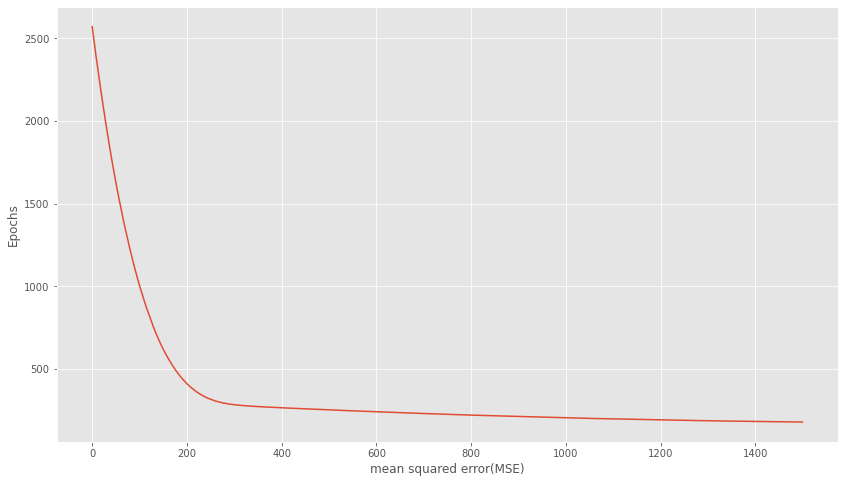

In [8]:
#plotting our MSE loss value over the runtime of our NN.
plt.plot(history.history['loss'])
plt.xlabel('mean squared error(MSE)')
plt.ylabel('Epochs')

In [9]:
print("\nFinal Mean Squared Error (MSE) value: %5.3f" % model.evaluate(x,y))

16/16 [==============================] - 0s 467us/step - loss: 180.6887

Final Mean Squared Error (MSE) value: 180.689


Below we can see our linear regression line overlayed on our dataset. While not a terrible choice of fit the data does diverge heavily from our line at certain points. Lets see if we can get some predictions in any of these areas. 

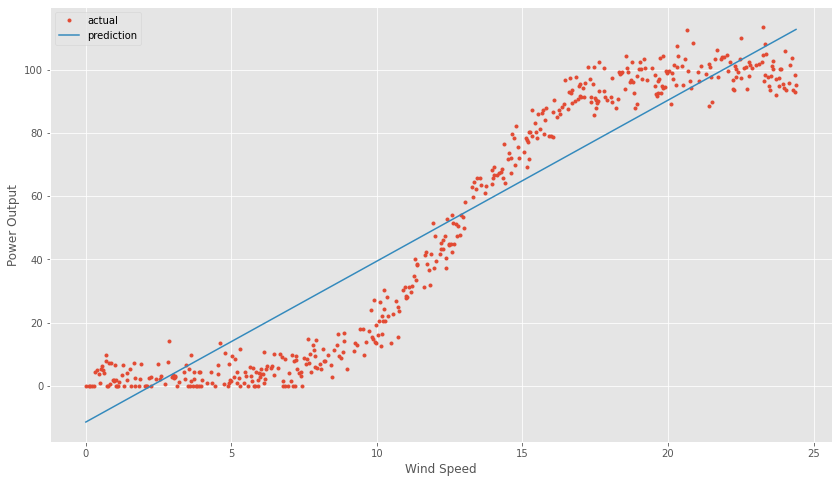

In [10]:
plt.plot(x, y, '.',label='actual' )
plt.plot(x, model.predict(x), label='prediction')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output')
plt.legend()

At the 10th row of the dataframe, we see the speed is 0.55km/h and our power output is 6.49Kw/h.

In [11]:
df.loc[10]

speed    0.551
power    6.498
Name: 10, dtype: float64

When passed into our model at the same speed we get a prediction of -8.58KW/h

In [12]:
model.predict([0.551])

array([[-8.551433]], dtype=float32)

Similarly, when the speed is 9.20km/h we can expect a power output of 11.12KW/h.

In [13]:
df.loc[180]

speed     9.209
power    11.120
Name: 180, dtype: float64

But when we pass this wind speed value into our model we get a value of 35.49KW/h.

In [14]:
model.predict([9.209])

array([[35.465775]], dtype=float32)

In [15]:
print("Here are the coefficients of our model: m =%5.2f and c = %5.2f:" % (model.get_weights()[0][0][0], model.get_weights()[1][0]))

Here are the coefficients of our model: m = 5.08 and c = -11.35:


<br>

#### Polynomial regression model

For our next model we will perform nonlinear regression as our dataset appears curvilinear. Our model will still be sequential but this time we will have a hidden layer consisting of 30 neurons each using the sigmoid activation function. Sigmoid activation was chosen as our data appears to follow a logistic growth curve which is the characteristic S shape trend that can be observed in the data[6](https://en.wikipedia.org/wiki/Sigmoid_function),[7](https://en.wikipedia.org/wiki/Logistic_function). The sigmoid/logistic function is computed as follows: 

$$f(x)={\frac {1}{1+e^{-x}}}$$

As the sigmoid function can only provide us with values between 0 and 1 for each neuron, we must add an additional Dense layer with a linear activation function. This is the output layer that scales our regression model to our dataset. It returns only a single value, our predicted *y* value. Our *weight* and *bias* are left as the default on both these layers. We compile this model in a largely similar manner, using the same *mean squared error* calculation. The only difference being that we specificy a slower learning rate to Adam to help increase the accuracy of our fit. 

Finally, we fit the data over 300 epochs, using a batch_size of 5. Specifiying a batch size can help to increase our accuracy further.

(Note: I chose to use 30 neurons for my hidden layer, which proved to be more than enough when fitting the model on the dataset.)

In [16]:
# # Create our neural network with the sequential class. Code adapted from [8].
model = kr.models.Sequential()
#Add Dense layer with 50 neurons, sigmoidal activation.
model.add(kr.layers.Dense(30, input_shape=(1,), activation='sigmoid'))
#Linear activation output layer to fit model to dataset.
model.add(kr.layers.Dense(1, activation='linear'))
#Compile with MSE + low learning rate.
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [17]:
# Fit the data.
history = model.fit(x, y, epochs=300, batch_size=5)

Epoch 1/300
98/98 [==============================] - 0s 433us/step - loss: 4219.1032
Epoch 2/300
98/98 [==============================] - 0s 454us/step - loss: 3642.9564
Epoch 3/300
98/98 [==============================] - 0s 433us/step - loss: 3356.6212
Epoch 4/300
98/98 [==============================] - 0s 814us/step - loss: 3260.6160
Epoch 5/300
98/98 [==============================] - 0s 546us/step - loss: 3089.3246
Epoch 6/300
98/98 [==============================] - 0s 567us/step - loss: 3071.4816
Epoch 7/300
98/98 [==============================] - 0s 701us/step - loss: 2904.3526
Epoch 8/300
98/98 [==============================] - 0s 660us/step - loss: 2629.7698
Epoch 9/300
98/98 [==============================] - ETA: 0s - loss: 2465.55 - 0s 907us/step - loss: 2482.1339
Epoch 10/300
98/98 [==============================] - 0s 711us/step - loss: 2380.3129
Epoch 11/300
98/98 [==============================] - 0s 814us/step - loss: 2303.6531
Epoch 12/300
98/98 [=================

98/98 [==============================] - 0s 433us/step - loss: 52.5893
Epoch 97/300
98/98 [==============================] - 0s 443us/step - loss: 51.7741
Epoch 98/300
98/98 [==============================] - 0s 454us/step - loss: 52.8567
Epoch 99/300
98/98 [==============================] - 0s 577us/step - loss: 48.6024
Epoch 100/300
98/98 [==============================] - 0s 495us/step - loss: 46.2407
Epoch 101/300
98/98 [==============================] - 0s 443us/step - loss: 46.5402
Epoch 102/300
98/98 [==============================] - 0s 443us/step - loss: 43.0798
Epoch 103/300
98/98 [==============================] - 0s 433us/step - loss: 43.6762
Epoch 104/300
98/98 [==============================] - 0s 454us/step - loss: 42.7093
Epoch 105/300
98/98 [==============================] - 0s 433us/step - loss: 41.0196
Epoch 106/300
98/98 [==============================] - 0s 454us/step - loss: 41.3814
Epoch 107/300
98/98 [==============================] - 0s 464us/step - loss: 39.07

98/98 [==============================] - 0s 505us/step - loss: 19.2439
Epoch 193/300
98/98 [==============================] - 0s 443us/step - loss: 18.3882
Epoch 194/300
98/98 [==============================] - 0s 433us/step - loss: 20.6862
Epoch 195/300
98/98 [==============================] - 0s 433us/step - loss: 18.7887
Epoch 196/300
98/98 [==============================] - 0s 567us/step - loss: 19.3053
Epoch 197/300
98/98 [==============================] - 0s 443us/step - loss: 19.0288
Epoch 198/300
98/98 [==============================] - 0s 443us/step - loss: 19.1309
Epoch 199/300
98/98 [==============================] - 0s 443us/step - loss: 18.3255
Epoch 200/300
98/98 [==============================] - 0s 454us/step - loss: 18.1457
Epoch 201/300
98/98 [==============================] - 0s 443us/step - loss: 19.7637
Epoch 202/300
98/98 [==============================] - 0s 485us/step - loss: 19.0251
Epoch 203/300
98/98 [==============================] - 0s 526us/step - loss: 17

98/98 [==============================] - 0s 577us/step - loss: 17.2720
Epoch 289/300
98/98 [==============================] - 0s 588us/step - loss: 17.4804
Epoch 290/300
98/98 [==============================] - 0s 567us/step - loss: 18.0375
Epoch 291/300
98/98 [==============================] - 0s 691us/step - loss: 18.6085
Epoch 292/300
98/98 [==============================] - 0s 753us/step - loss: 18.3178
Epoch 293/300
98/98 [==============================] - 0s 670us/step - loss: 18.7816
Epoch 294/300
98/98 [==============================] - 0s 608us/step - loss: 17.0479
Epoch 295/300
98/98 [==============================] - 0s 536us/step - loss: 18.4209
Epoch 296/300
98/98 [==============================] - 0s 588us/step - loss: 16.9636
Epoch 297/300
98/98 [==============================] - 0s 495us/step - loss: 18.2245
Epoch 298/300
98/98 [==============================] - 0s 536us/step - loss: 17.5341
Epoch 299/300
98/98 [==============================] - 0s 577us/step - loss: 16

<br>

#### Analysis
Below we see our regression model on our dataset. From initial observations it looks like an excellent fit. 

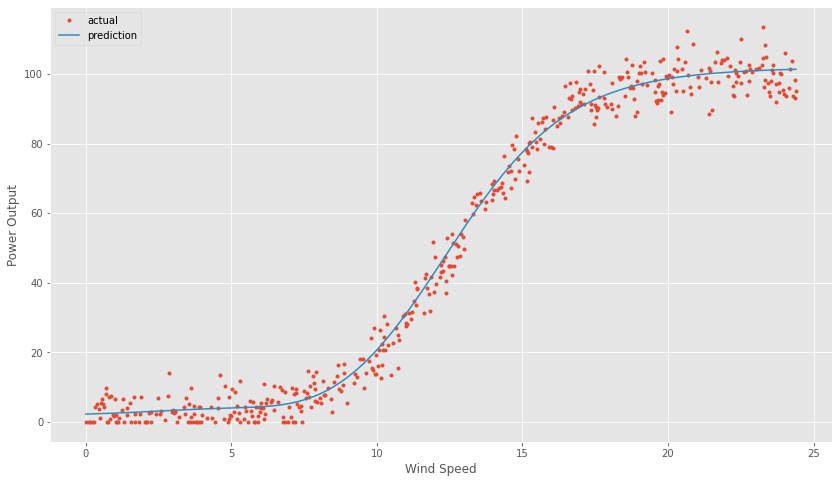

In [18]:
plt.plot(x,y,'.',label='actual' )
plt.plot(x, model.predict(x),label='prediction' )
plt.xlabel('Wind Speed')
plt.ylabel('Power Output')
plt.legend()

Here is our plot of the MSE over the course of the curve fitting process, note that by the end of 300th epoch our loss value reaches to values as low as the high teens. 

Text(0, 0.5, 'Epochs')

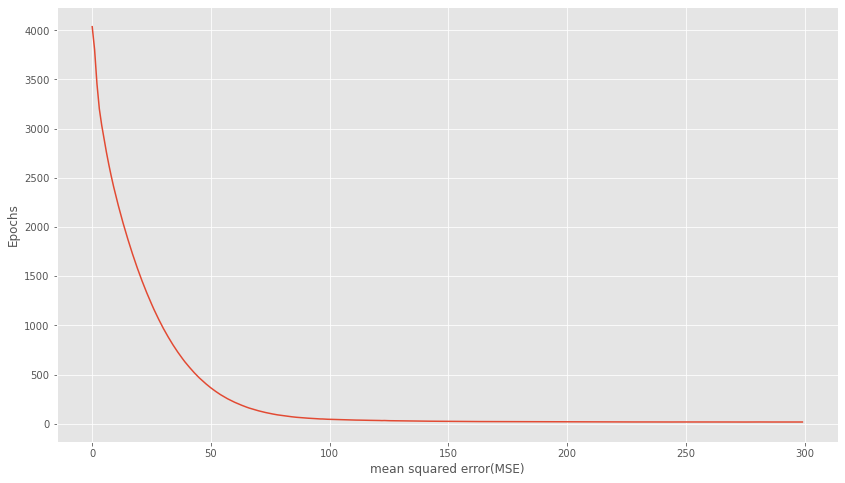

In [19]:
#plotting our MSE loss value over the runtime of our NN.
plt.plot(history.history['loss'])
plt.xlabel('mean squared error(MSE)')
plt.ylabel('Epochs')

In [20]:
print("\nFinal Mean Squared Error (MSE) value: %5.3f" % model.evaluate(x,y))

16/16 [==============================] - 0s 467us/step - loss: 17.4383

Final Mean Squared Error (MSE) value: 17.438


Finally, lets look at some predictions that we get as *power* values when we give the model different wind speeds. Below are three randomly selected rows from our dataframe, the speed values from these rows are passed into our model. As we can see in all three of the examples our prediction values are highly accurate being only a Kilowatt away at max. 

In [21]:
[df.loc[5],"",df.loc[230],"",df.loc[450]]

[speed    0.325
 power    4.331
 Name: 5, dtype: float64,
 '',
 speed    11.737
 power    38.552
 Name: 230, dtype: float64,
 '',
 speed     22.673
 power    100.698
 Name: 450, dtype: float64]

In [22]:
print("Predicted power when speed is %5.3fkm/h: %5.3fKW/h" % (df.loc[5][0], model.predict([df.loc[5][0]])))
print("ACTUAL: %5.3fKW/h" % df.loc[5][1])
print("\nPredicted power when speed is %5.3fkm/h: %5.3fKW/h" % (df.loc[230][0], model.predict([df.loc[230][0]])))
print("ACTUAL: %5.3fKW/h" % df.loc[230][1])
print("\nPredicted power when speed is %5.3fkm/h: %5.3fKW/h" % (df.loc[450][0], model.predict([df.loc[450][0]])))
print("ACTUAL: %5.3fKW/h" % df.loc[450][1])

Predicted power when speed is 0.325km/h: 2.367KW/h
ACTUAL: 4.331KW/h

Predicted power when speed is 11.737km/h: 39.923KW/h
ACTUAL: 38.552KW/h

Predicted power when speed is 22.673km/h: 100.787KW/h
ACTUAL: 100.698KW/h


<br>

#### Summary

While our linear model achieved the close to the best fit it could, it proved to be unsuitable in its prediction accuracy. The polynomial model on the other hand appears much more reliable at accurately predicting power regardless of windspeed. While both models will be utilized in the powerprod web service, our polynomial model is the clear winner in terms of returning accurate values. 

***
# Sources

[1] Keras library, https://keras.io/

[2] Keras, Keras Documentation, The Sequential class https://keras.io/api/models/sequential/

[3] tutorialspoint, Keras - Dense Layer, https://www.tutorialspoint.com/keras/keras_dense_layer.htm

[4] Wikipedia, Mean squared error, https://en.wikipedia.org/wiki/Mean_squared_error

[5] freeCodeCamp, Machine learning: an introduction to mean squared error and regression lines, Moshe Binieli, https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/

[6] Wikipedia, Sigmoid Function, https://en.wikipedia.org/wiki/Sigmoid_function

[7] Wikipedia, Logistic Function, https://en.wikipedia.org/wiki/Logistic_function

[8] GitHub, Linear regression in keras, Ian McLoughlin, https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-linear.ipynb


***
# End